# Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes.

https://www.cs.toronto.edu/~kriz/cifar.html


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images



In [ ]:
y_train.shape

(50000, 1)

In [ ]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array


y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are



In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

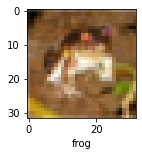

In [ ]:
plot_sample(X_train, y_train, 0)


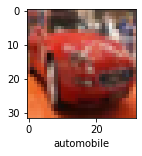

In [ ]:
plot_sample(X_train, y_train, 5)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Simple NN

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ann.fit(X_train, y_train, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
1250/1250 [==============================] - 11s 6ms/step - loss: 1.8386 - accuracy: 0.3424 - val_loss: 1.7215 - val_accuracy: 0.3913
Epoch 2/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6485 - accuracy: 0.4194 - val_loss: 1.6443 - val_accuracy: 0.4272
Epoch 3/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5694 - accuracy: 0.4480 - val_loss: 1.5867 - val_accuracy: 0.4380
Epoch 4/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5091 - accuracy: 0.4685 - val_loss: 1.5940 - val_accuracy: 0.4354
Epoch 5/5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4637 - accuracy: 0.4850 - val_loss: 1.5543 - val_accuracy: 0.4539


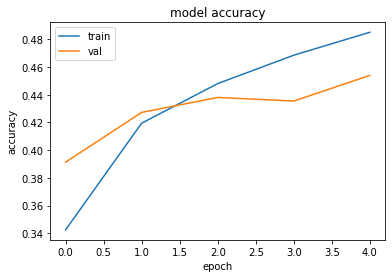

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

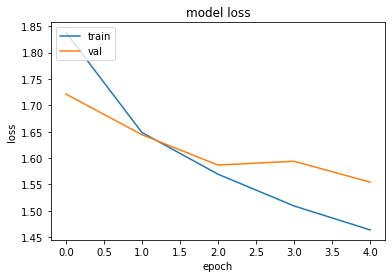

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# CNN

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True)


Epoch 1/10
1250/1250 [==============================] - 36s 8ms/step - loss: 1.5130 - accuracy: 0.4544 - val_loss: 1.2448 - val_accuracy: 0.5609
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1617 - accuracy: 0.5914 - val_loss: 1.1064 - val_accuracy: 0.6185
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0279 - accuracy: 0.6427 - val_loss: 1.0473 - val_accuracy: 0.6337
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9436 - accuracy: 0.6698 - val_loss: 0.9976 - val_accuracy: 0.6570
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8792 - accuracy: 0.6952 - val_loss: 0.9621 - val_accuracy: 0.6641
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8248 - accuracy: 0.7146 - val_loss: 0.9651 - val_accuracy: 0.6732
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7828 - accuracy: 0.7294 - val_loss: 0.9761 - val_accuracy

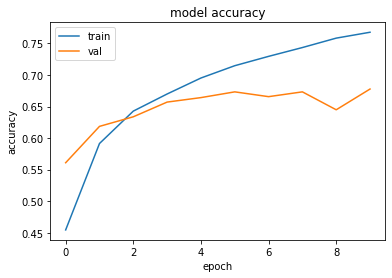

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

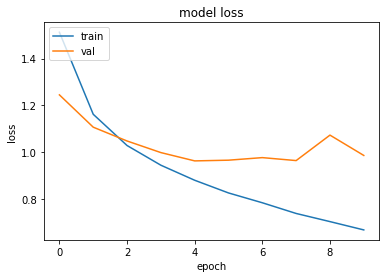

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
results = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9977 - accuracy: 0.6819


In [ ]:
print("test loss, test acc:", results)

test loss, test acc: [0.9977028369903564, 0.6819000244140625]


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.7502881e-03, 8.4535313e-06, 2.3781946e-03, 4.9123788e-01,
        1.9527359e-03, 3.1145048e-01, 6.3948296e-03, 2.7403788e-04,
        1.7766996e-01, 8.8313763e-04],
       [6.1969166e-03, 7.0166111e-01, 5.9023014e-06, 5.2196672e-08,
        7.1975762e-07, 3.4439525e-09, 1.2557543e-07, 3.1332270e-08,
        2.9130167e-01, 8.3343073e-04],
       [8.8639289e-02, 4.8651013e-01, 1.9791088e-04, 3.3653242e-04,
        1.7448302e-04, 1.3660611e-05, 9.4806392e-06, 1.4614991e-04,
        4.2008549e-01, 3.8869195e-03],
       [7.1463400e-01, 5.1089197e-02, 1.2633234e-02, 3.4832297e-04,
        1.7451253e-03, 1.7071950e-05, 1.6609773e-05, 1.7289729e-04,
        2.1933098e-01, 1.2542795e-05],
       [1.5094883e-05, 2.8023875e-04, 4.5503516e-02, 1.2419614e-02,
        7.8897321e-01, 7.1088863e-03, 1.4526209e-01, 3.3008779e-04,
        7.7293429e-05, 2.9931309e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [ ]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

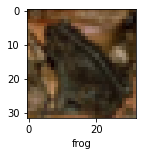

In [ ]:
plot_sample(X_test, y_test,30)
